In [3]:
pip install python-picard


Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install EDFlib-Python

Note: you may need to restart the kernel to use updated packages.


In [49]:
!pip install pyedflib


     ---------------------------------------- 2.2/2.2 MB 4.2 MB/s eta 0:00:00


In [17]:
# Function used for creating a numpy array, where a mathematical operation can be applied to each entry 
# in an easy and automatic way. On the other side, linspace, here will be used for generation of a time-axis.
from numpy import array, linspace
import numpy as np
import matplotlib.pyplot as plt
import pywt
# Numpy package is dedicated to simplify the work (operations between) with arrays/lists
#from numpy import cumsum, concatenate, zeros, linspace, average, power, absolute, mean, std, max, array, diff, where

# Scientific packages
from scipy.signal import butter, lfilter
from scipy.stats import linregress


ModuleNotFoundError: No module named 'pywt'

In [4]:
import mne
#data_path = mne.datasets.sample.data_path()
raw_fname = "C:/Users/Equipo/OneDrive/Escritorio/Introduccion_a_señales_biomedicas/Github/inb_2024_gh12/ISB_Informes/L10_Procesamiento_EEG/Datos_EEG_physionet/Subject03_1.edf"
raw = mne.io.read_raw_edf(raw_fname)
raw.crop(tmin=100, tmax=130)  # take 30 seconds for speed

# pick only EEG channels, muscle artifact is basically not picked up by MEG
# if you have a simultaneous recording, you may want to do ICA on MEG and EEG
# separately
raw.pick(picks="eeg", exclude="bads")

rename_dict = {
    'EEG Fp1': 'Fp1', 'EEG Fp2': 'Fp2', 'EEG F3': 'F3', 'EEG F4': 'F4', 
    'EEG F7': 'F7', 'EEG F8': 'F8', 'EEG T3': 'T7', 'EEG T4': 'T8', 
    'EEG C3': 'C3', 'EEG C4': 'C4', 'EEG T5': 'P7', 'EEG T6': 'P8', 
    'EEG P3': 'P3', 'EEG P4': 'P4', 'EEG O1': 'O1', 'EEG O2': 'O2', 
    'EEG Fz': 'Fz', 'EEG Cz': 'Cz', 'EEG Pz': 'Pz'
    # Agrega más mapeos si es necesario
}
raw.rename_channels(rename_dict)

# Excluir los canales que no están en el montaje estándar
channels_to_exclude = ['EEG A2-A1', 'ECG ECG']
raw.drop_channels(channels_to_exclude)

# Agregar ubicaciones de electrodos usando un montaje estándar
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

# ICA works best with a highpass filter applied
raw.load_data()
raw.filter(l_freq=1.0, h_freq=None)

Extracting EDF parameters from C:\Users\Equipo\OneDrive\Escritorio\Introduccion_a_señales_biomedicas\Github\inb_2024_gh12\ISB_Informes\L10_Procesamiento_EEG\Datos_EEG_physionet\Subject03_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15000  =      0.000 ...    30.000 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<RawEDF | Subject03_1.edf, 19 x 15001 (30.0 s), ~2.2 MB, data loaded>

In [5]:
ica = mne.preprocessing.ICA(
    n_components=15, method="picard", max_iter="auto", random_state=97
)

ica.fit(raw)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 0.4s.


<ICA | raw data decomposition, method: picard (fit in 58 iterations on 15001 samples), 15 ICA components (19 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=15, n_times=15001
    Range : 50000 ... 65000 =    100.000 ...   130.000 secs
Ready.
Using matplotlib as 2D backend.


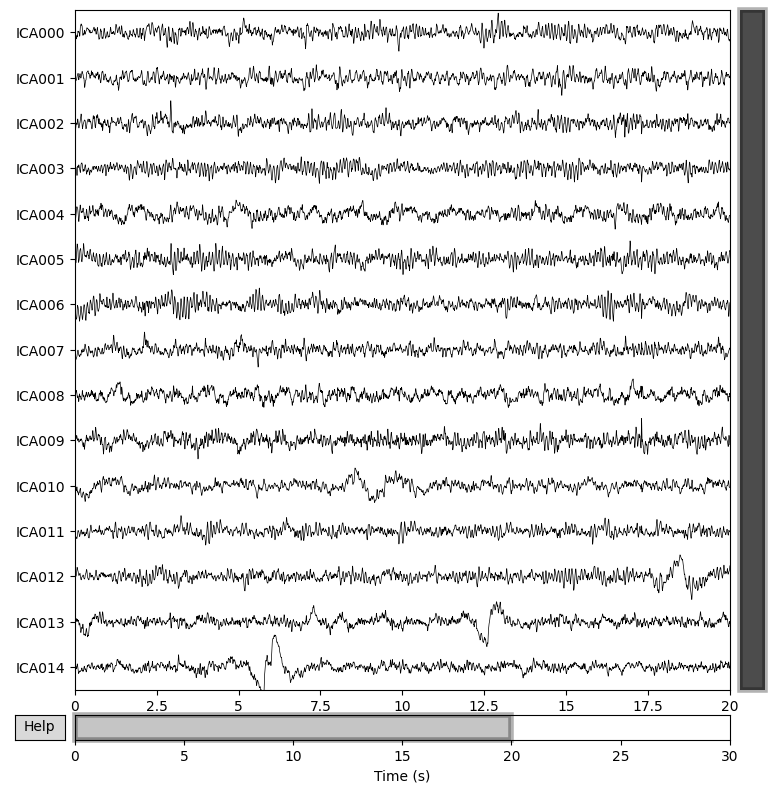

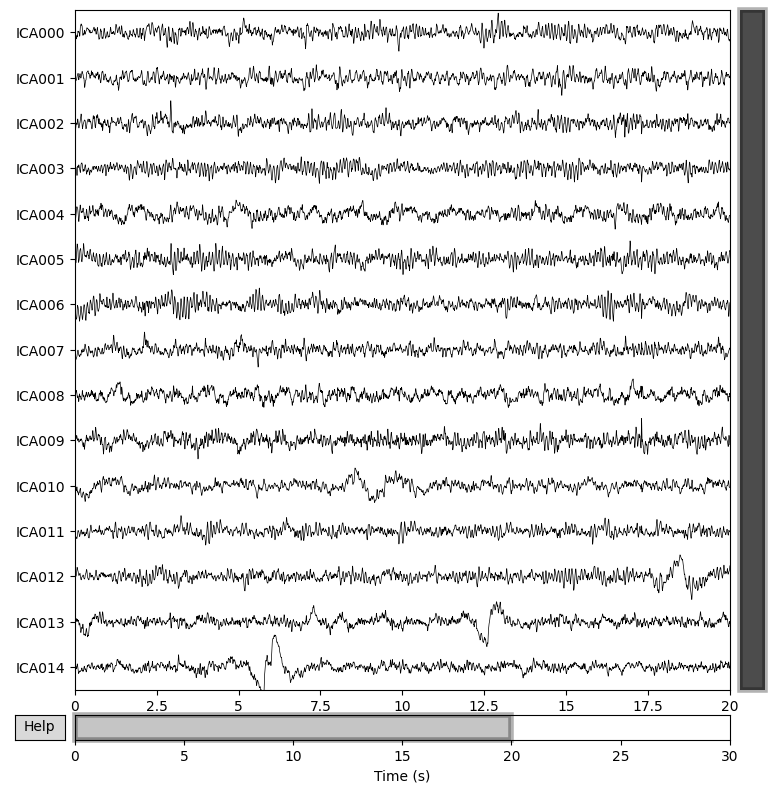

In [6]:
ica.plot_sources(raw)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated


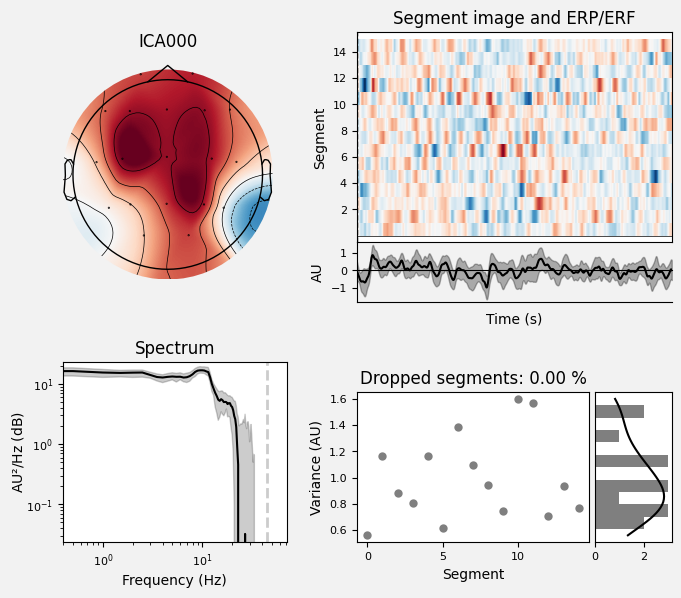

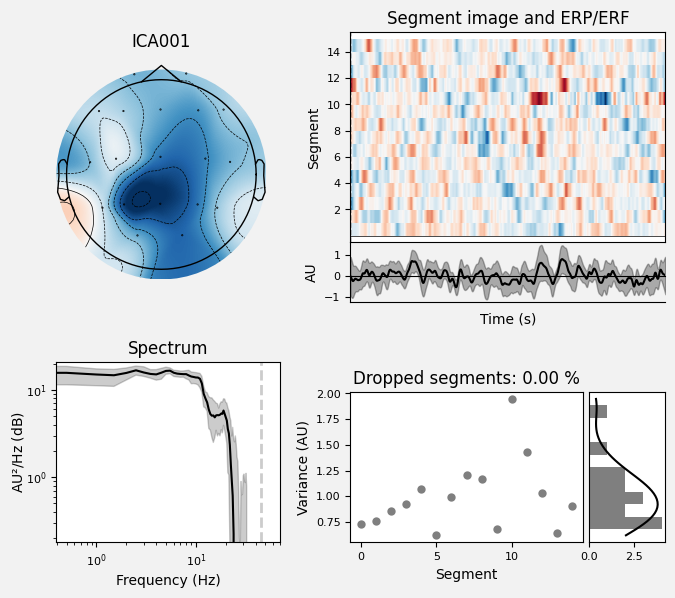

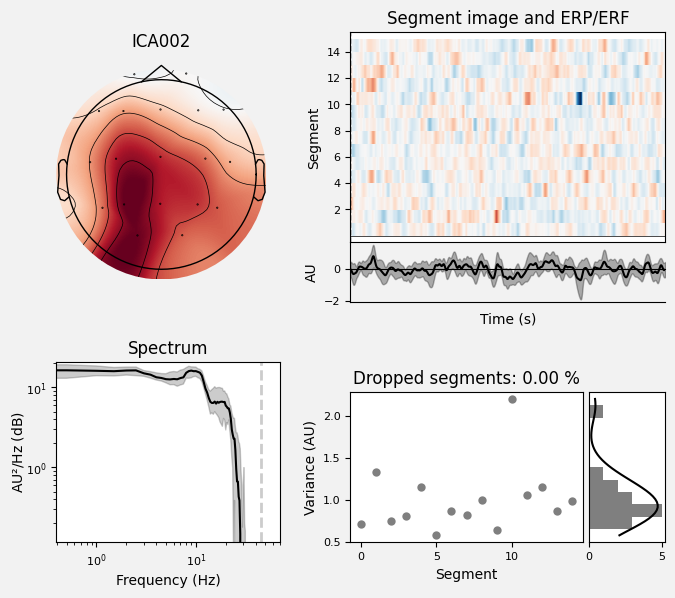

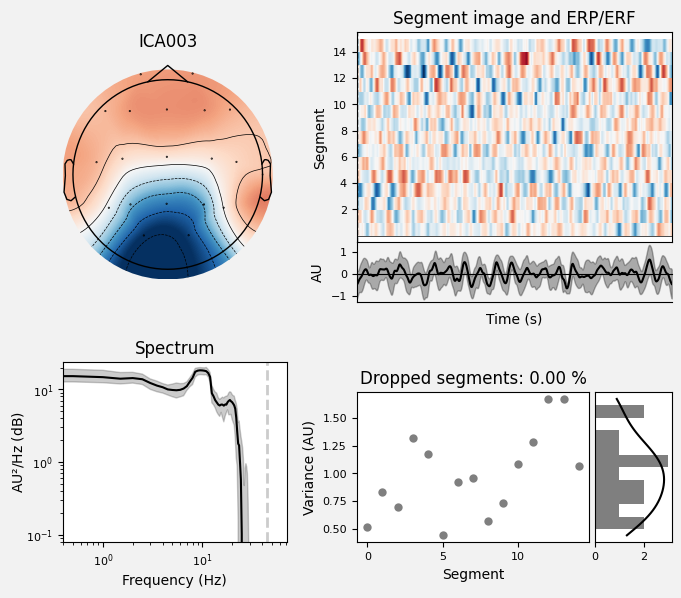

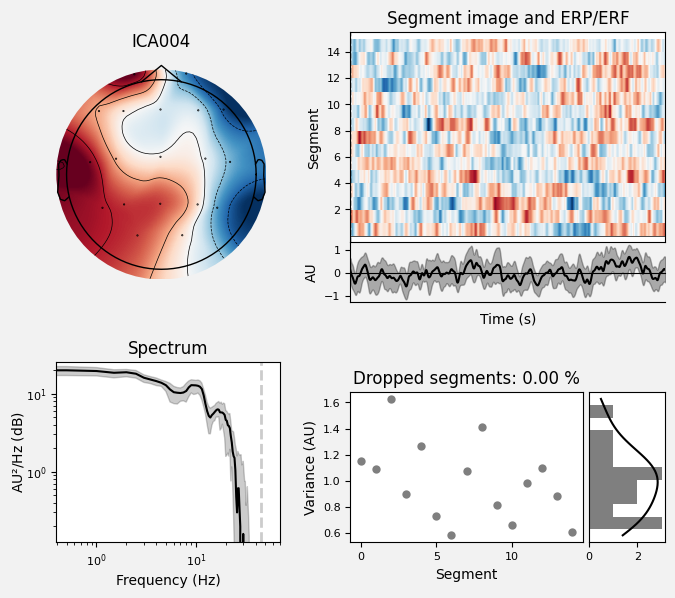

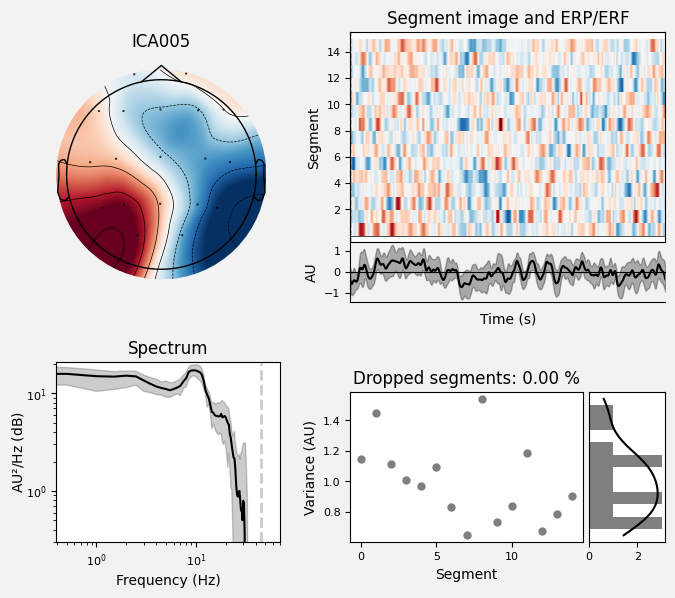

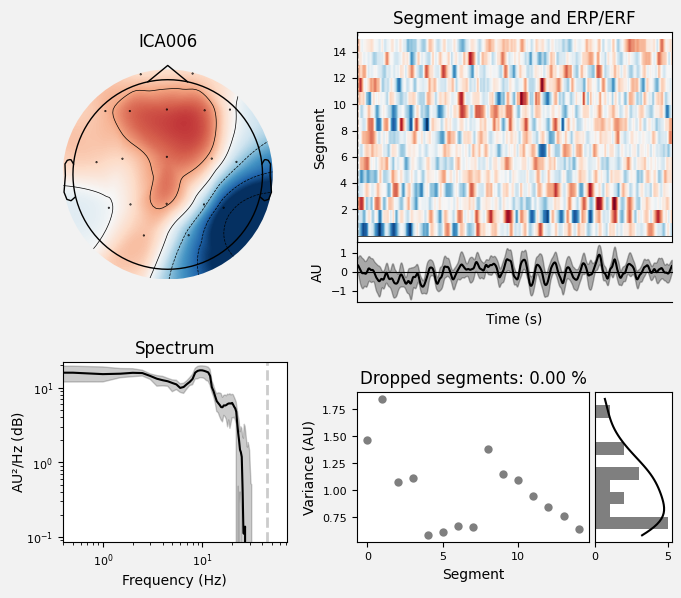

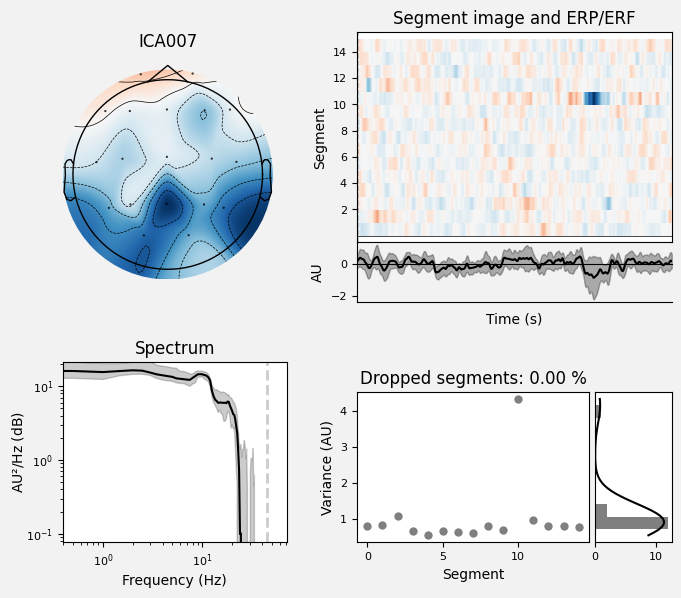

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [7]:
idx = [0, 1, 2, 3, 4, 5, 6, 7]
ica.plot_properties(raw, picks=idx, log_scale=True)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated


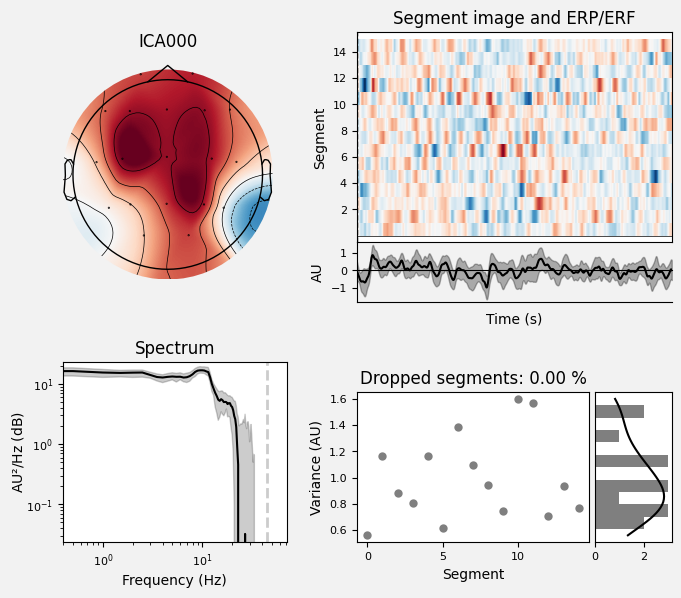

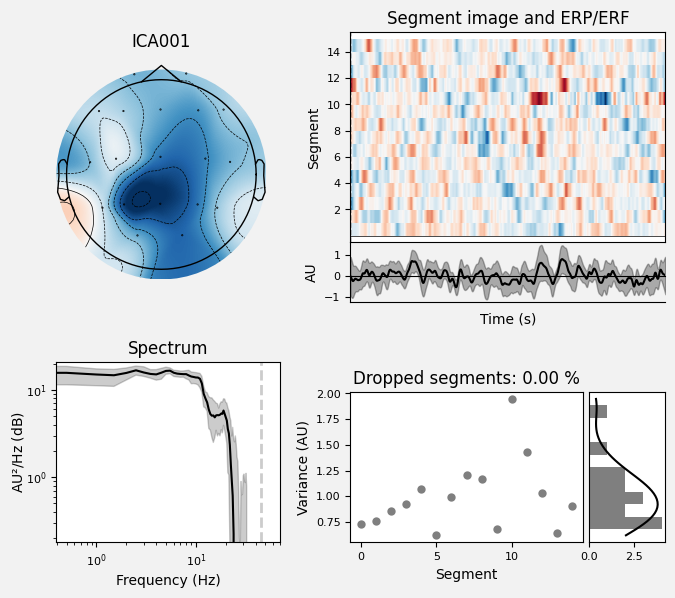

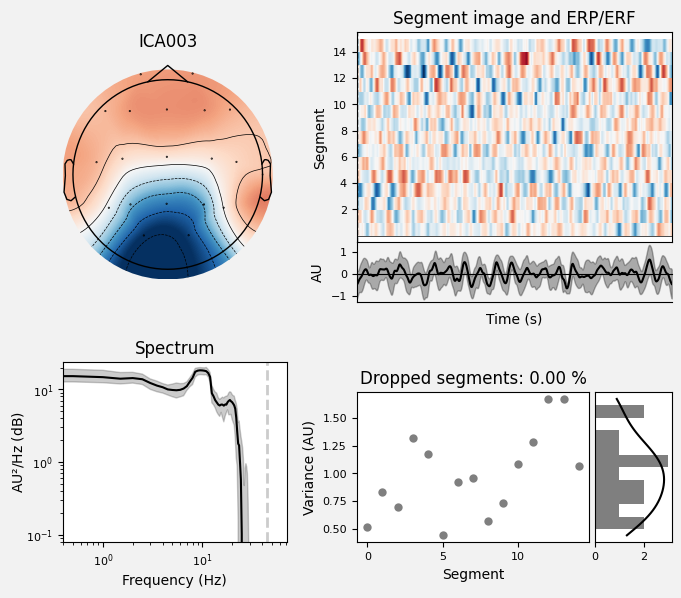

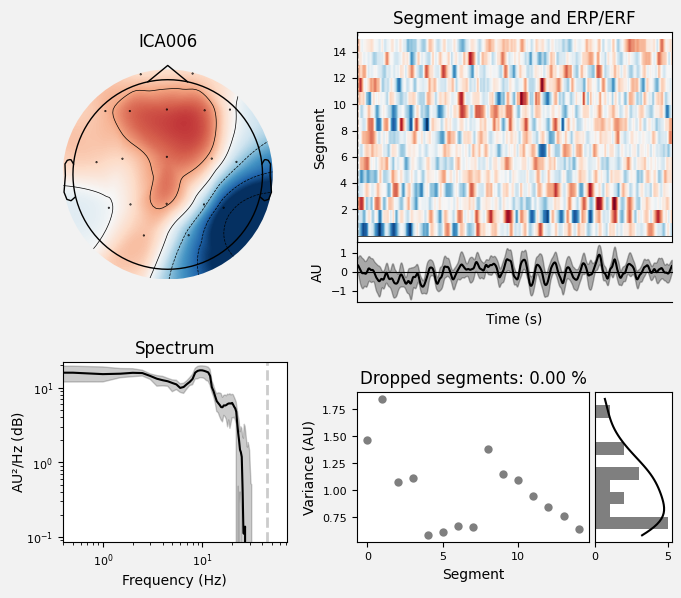

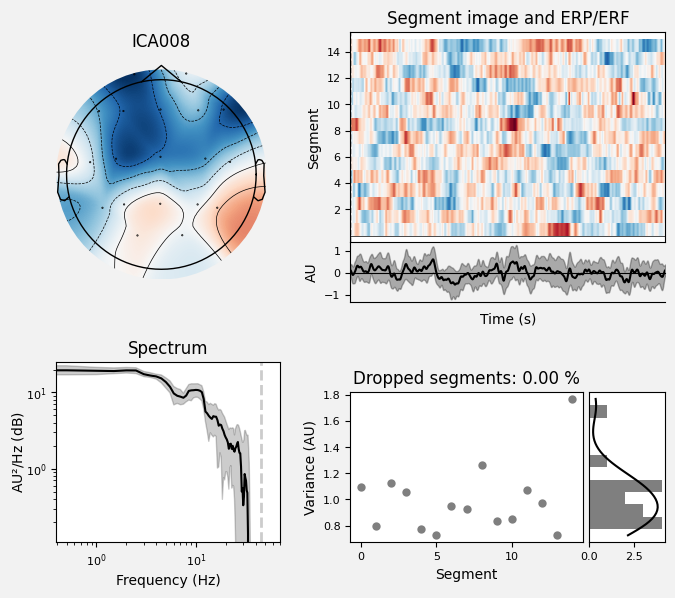

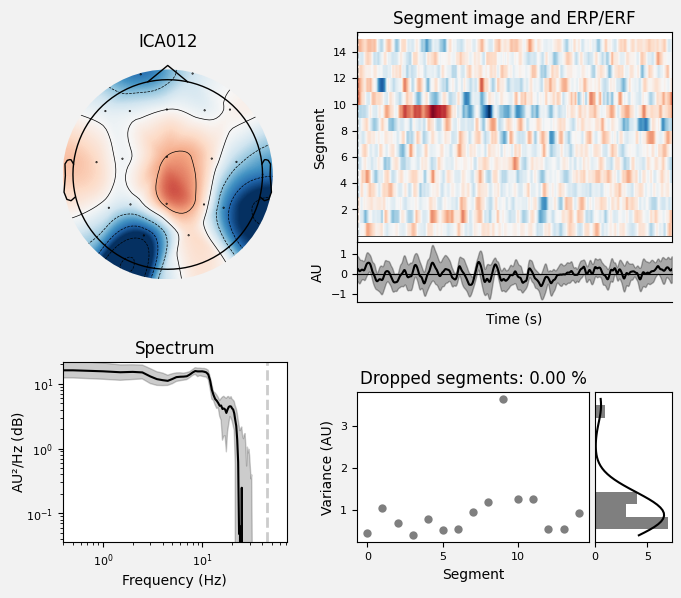

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 19 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 6 ICA components
    Projecting back using 19 PCA components


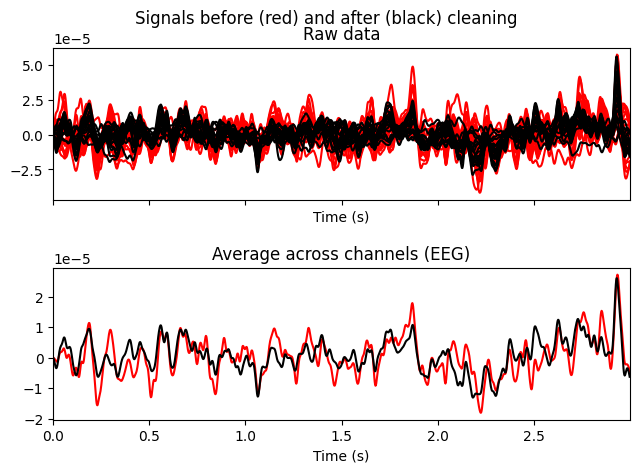

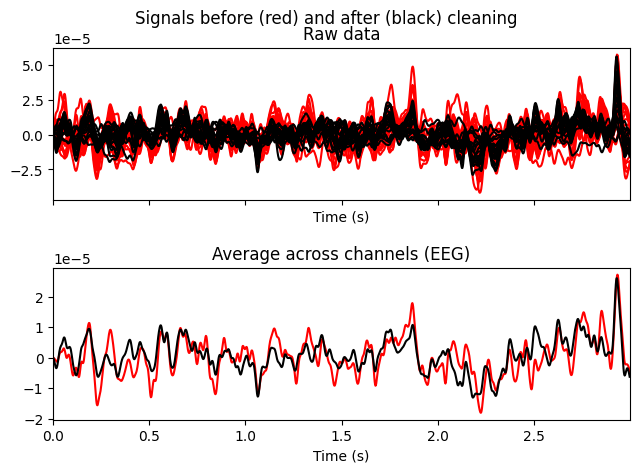

In [8]:
muscle_idx = [0,1,3,6,8,12]
ica.plot_properties(raw, picks=muscle_idx, log_scale=True)

# first, remove blinks and heartbeat to compare
blink_idx = [0]
heartbeat_idx = [5]
ica.apply(raw, exclude=blink_idx + heartbeat_idx)
ica.plot_overlay(raw, exclude=muscle_idx)

Effective window size : 0.512 (s)


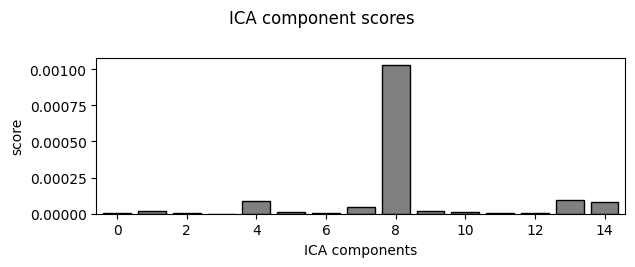

Manually found muscle artifact ICA components:      [0, 1, 3, 6, 8, 12]
Automatically found muscle artifact ICA components: []


In [9]:
muscle_idx_auto, scores = ica.find_bads_muscle(raw)
ica.plot_scores(scores, exclude=muscle_idx_auto)
print(
    f"Manually found muscle artifact ICA components:      {muscle_idx}\n"
    f"Automatically found muscle artifact ICA components: {muscle_idx_auto}"
)

Extracting EDF parameters from C:\Users\Equipo\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 529 samples (3.306 sec)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Creating RawArray with float64 data, n_channels=15, n_times=9760
    Range : 0 ... 9759 =      0.000 ...    60.994 secs
Ready.


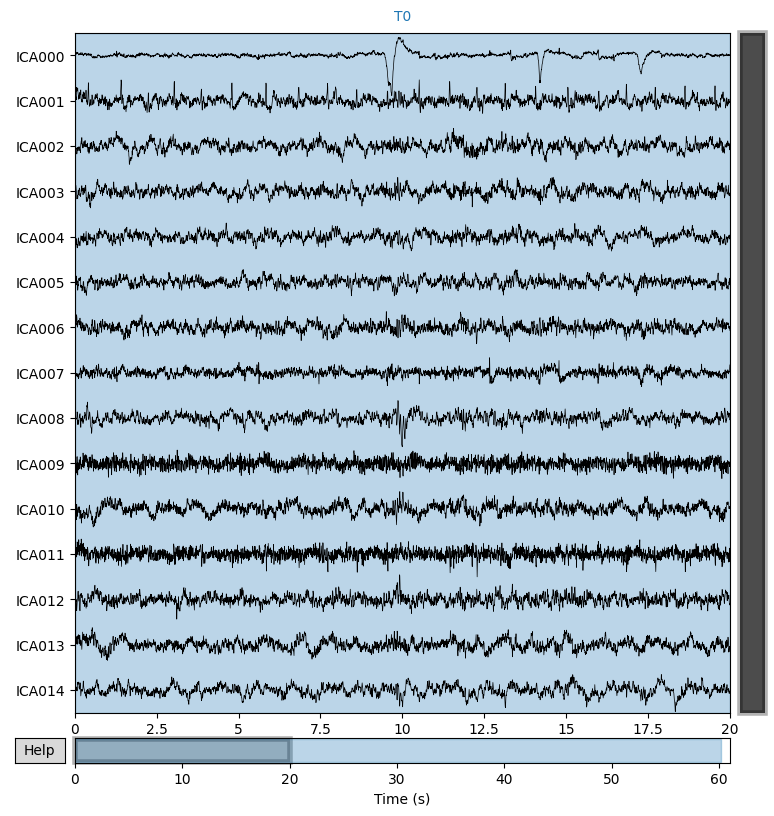

Effective window size : 1.600 (s)
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


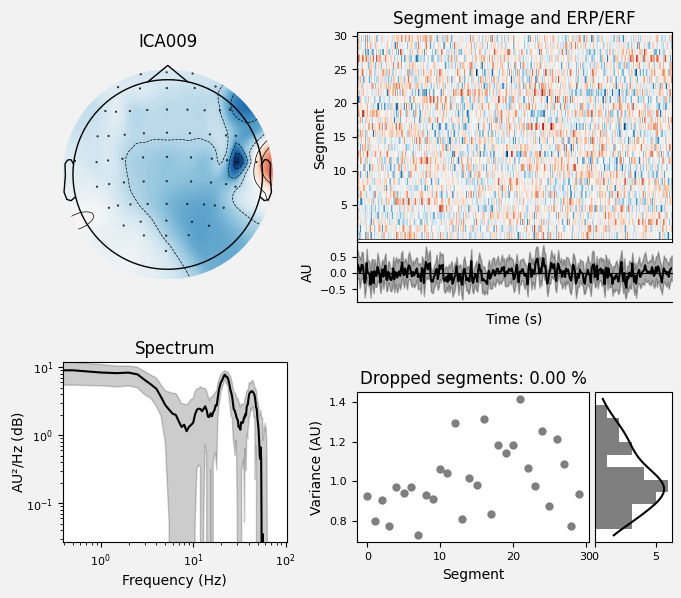

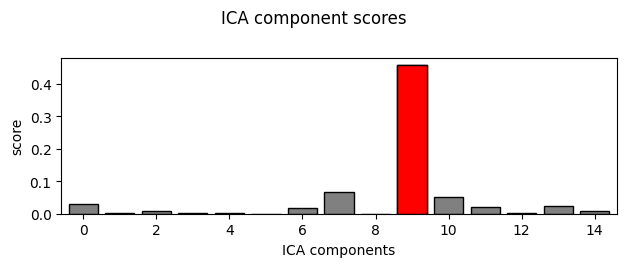

Manually found muscle artifact ICA components:      [0, 1, 3, 6, 8, 12]
Automatically found muscle artifact ICA components: [9]
Extracting EDF parameters from C:\Users\Equipo\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S002\S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 529 samples (3.306 sec)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Creating RawArray with float64 data, n_channels=15, n_times=9760
    Range : 0 ... 9759 =      0.000 ...    60.994 secs
Ready.


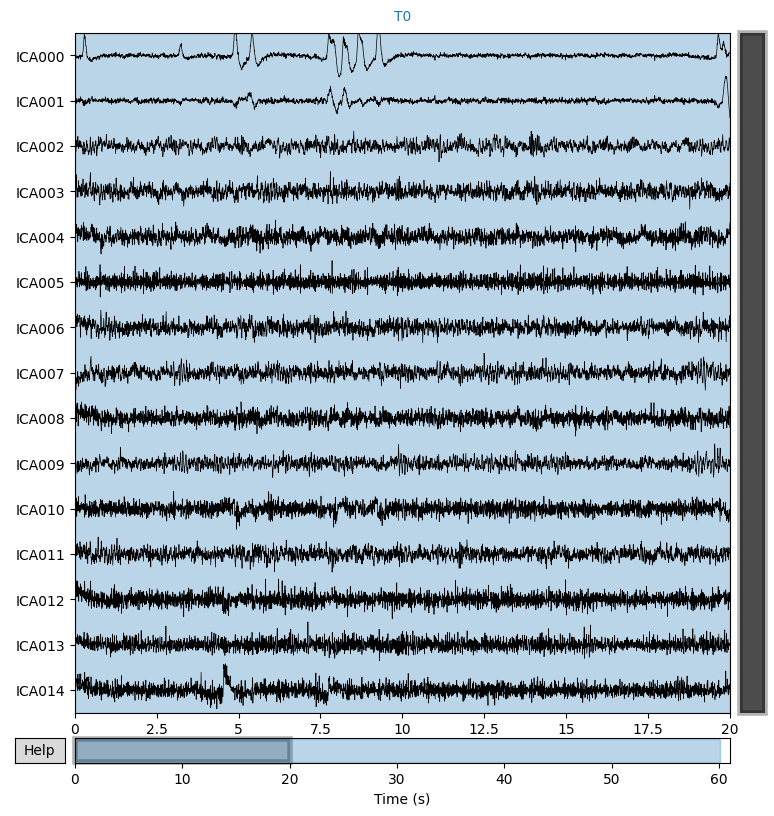

Effective window size : 1.600 (s)
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


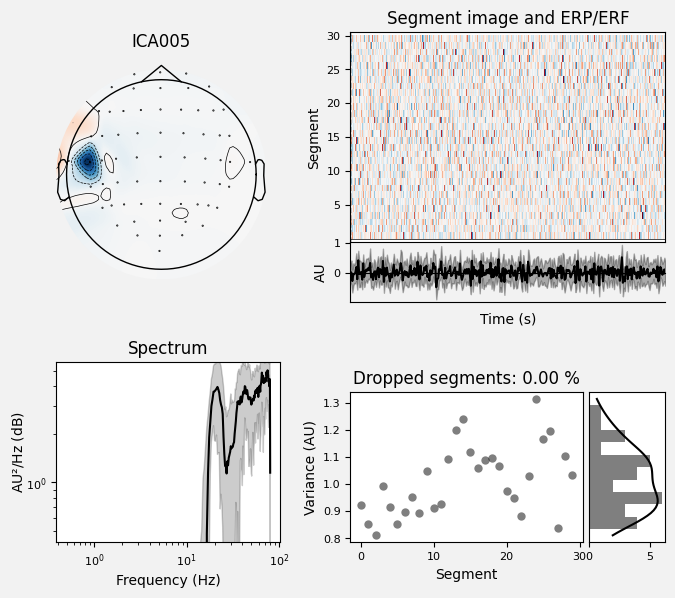

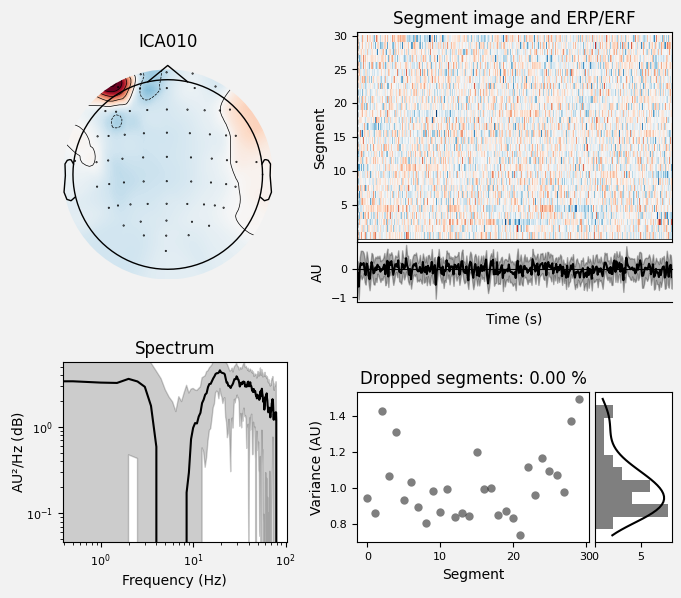

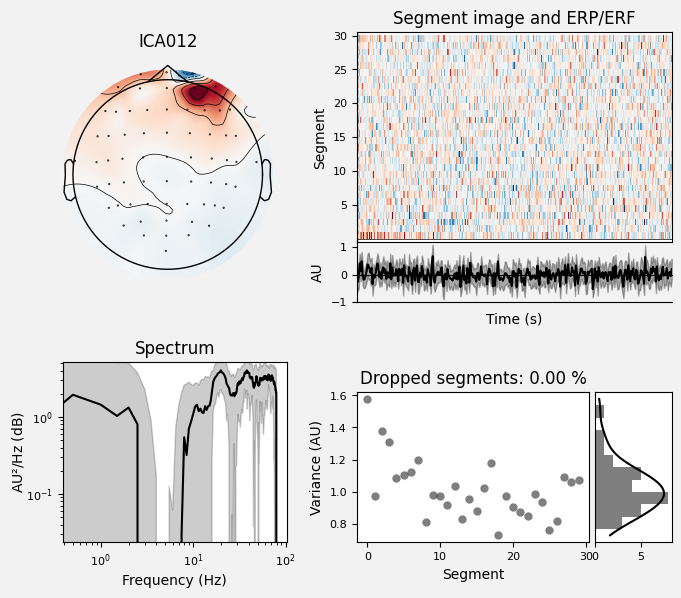

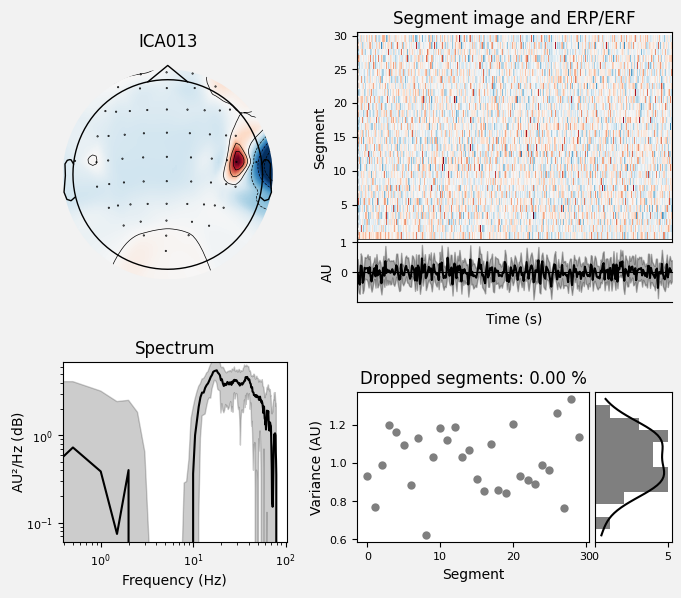

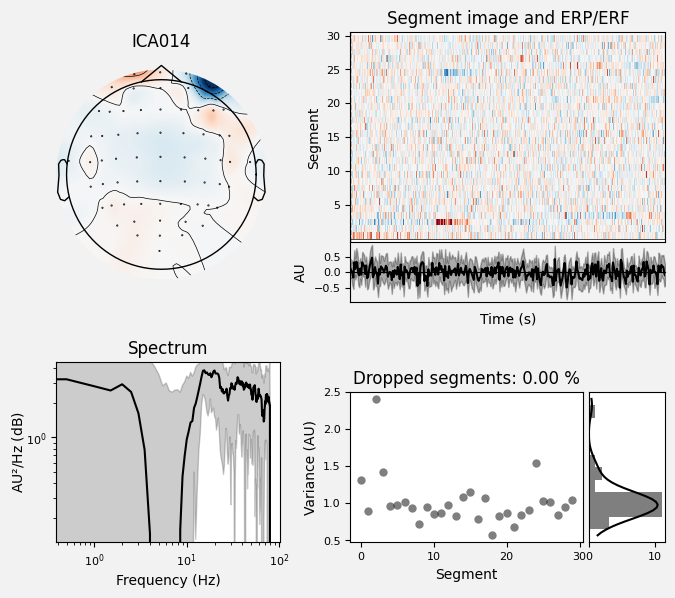

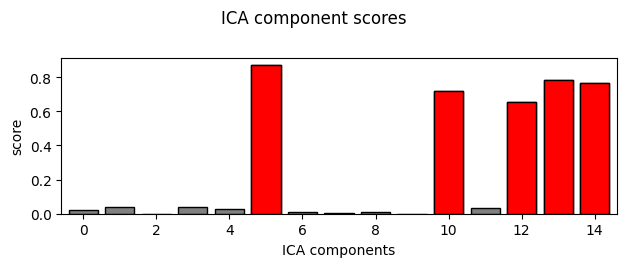

Manually found muscle artifact ICA components:      [0, 1, 3, 6, 8, 12]
Automatically found muscle artifact ICA components: [5, 10, 12, 13, 14]


In [10]:
for sub in (1, 2):
    raw = mne.io.read_raw_edf(
        mne.datasets.eegbci.load_data(subject=sub, runs=(1,))[0], preload=True
    )
    mne.datasets.eegbci.standardize(raw)  # set channel names
    montage = mne.channels.make_standard_montage("standard_1005")
    raw.set_montage(montage)
    raw.filter(l_freq=1.0, h_freq=None)

    # Run ICA
    ica = mne.preprocessing.ICA(
        n_components=15, method="picard", max_iter="auto", random_state=97
    )
    ica.fit(raw)
    ica.plot_sources(raw)
    muscle_idx_auto, scores = ica.find_bads_muscle(raw)
    ica.plot_properties(raw, picks=muscle_idx_auto, log_scale=True)
    ica.plot_scores(scores, exclude=muscle_idx_auto)

    print(
        f"Manually found muscle artifact ICA components:      {muscle_idx}\n"
        "Automatically found muscle artifact ICA components: "
        f"{muscle_idx_auto}"
    )

In [41]:
# Suponiendo que ya tienes definido tu objeto ICA y datos raw
comp_exclude = [0, 14]  # Componentes a excluir
n_pca_components = 30  # Número deseado de componentes PCA

# Aplicar la corrección a los datos con el número especificado de componentes PCA
raw_corrected = ica.apply(raw.copy(), exclude=comp_exclude, n_pca_components=n_pca_components)

# Verificar el resultado
print(raw_corrected)

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
<RawEDF | S002R01.edf, 64 x 9760 (61.0 s), ~4.9 MB, data loaded>


In [45]:
# Guardar la variable raw_corrected en un archivo .edf
output_file = 'ICA_removed.edf'
mne.export.export_raw(output_file, raw_corrected, fmt='edf')

<Figure size 1300x1000 with 0 Axes>

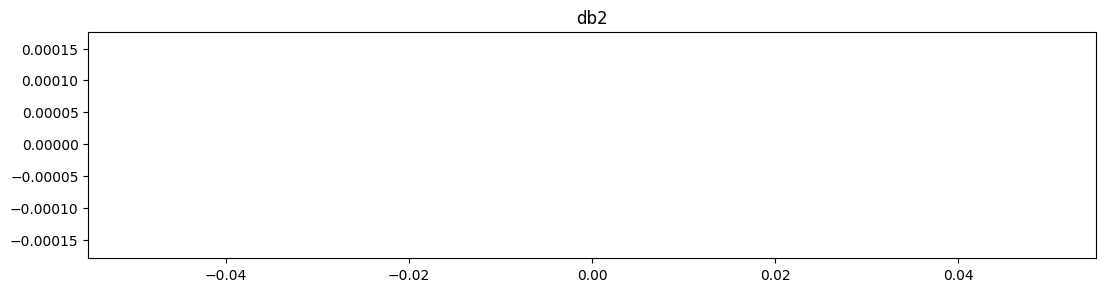

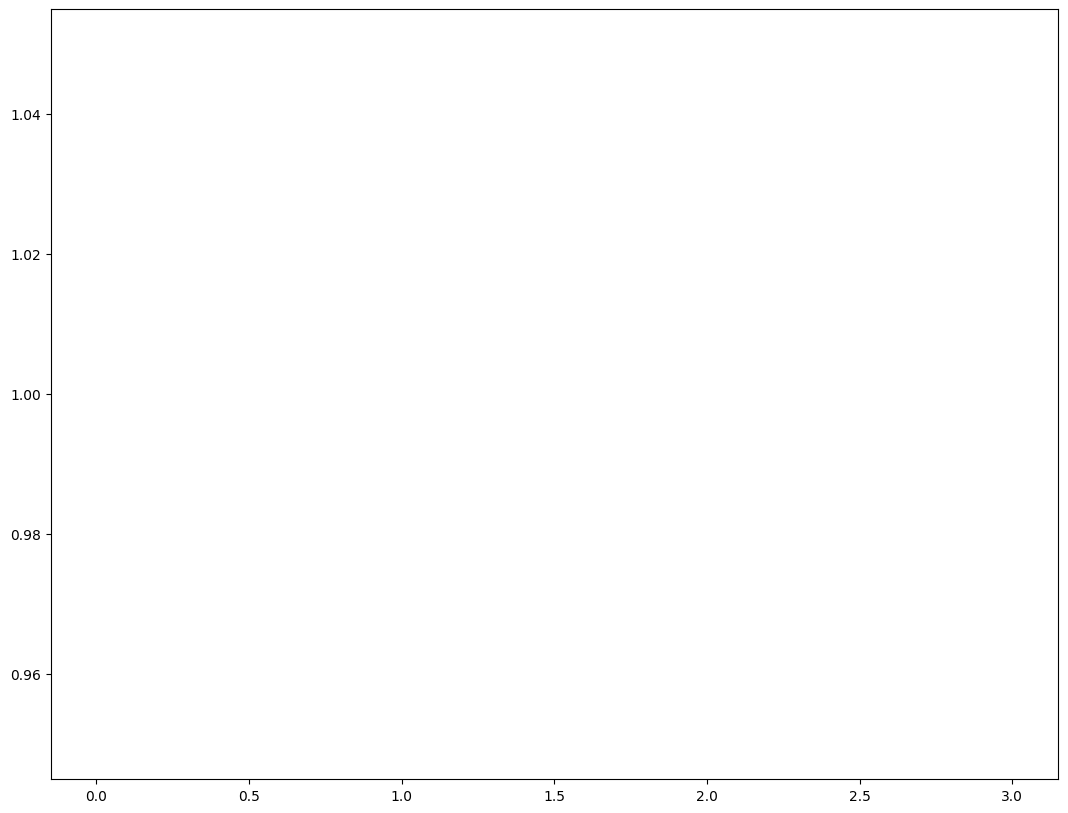

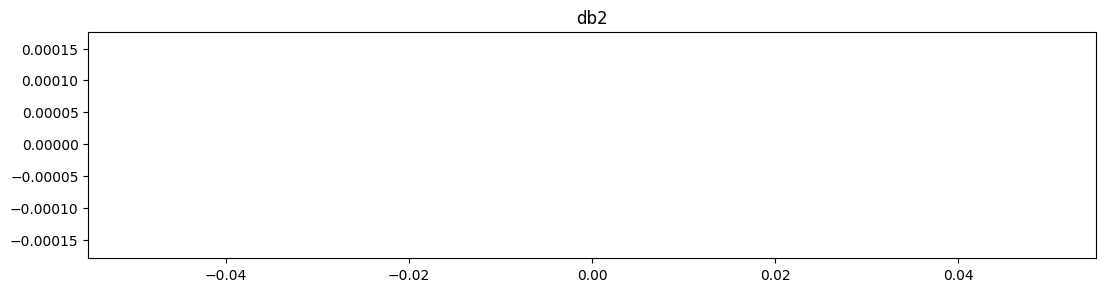

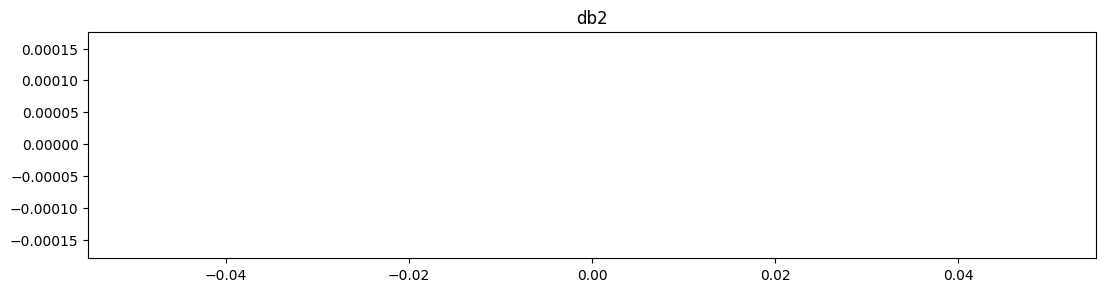

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

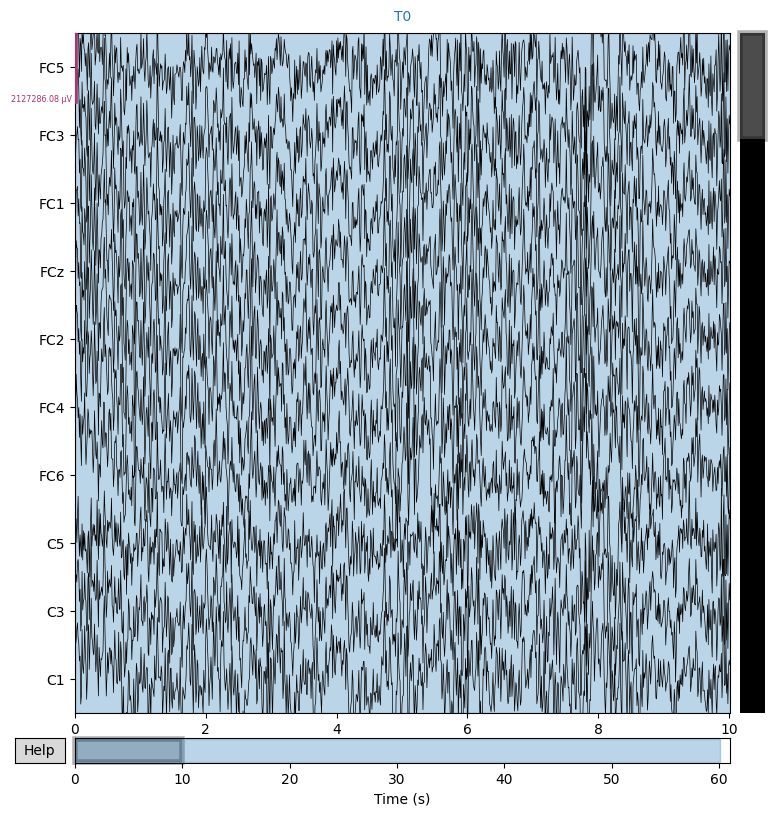

In [47]:
# Preprocesamiento: normalización y alineamiento
import numpy as np
import matplotlib.pyplot as plt

# Asegúrate de que raw_corrected es un objeto numpy array
raw_corrected_data = raw_corrected.get_data() if hasattr(raw_corrected, 'get_data') else raw_corrected

# Calcular la media y desviación estándar para la normalización
mean = np.mean(raw_corrected_data, axis=1, keepdims=True)
std = np.std(raw_corrected_data, axis=1, keepdims=True)

# Normalizar los datos
data_normalized = (raw_corrected_data - mean) / std

# Asegurarse de que data_normalized es compatible con resample y plot
if hasattr(raw_corrected, 'copy'):
    raw_corrected_normalized = raw_corrected.copy()
    raw_corrected_normalized._data = data_normalized
    raw_corrected_normalized.resample(100)

    # Graficar los datos normalizados
    raw_corrected_normalized.plot(n_channels=10, scalings='auto')
    plt.show()
else:
    # Manejo alternativo si raw_corrected no es un objeto esperado
    plt.plot(data_normalized.T[:10])  # Graficar los primeros 10 canales
    plt.show()


In [52]:
import pyedflib


edf_file_path = 'ICA_removed.edf'
edf_reader = pyedflib.EdfReader(edf_file_path)

# Obtener y mostrar información básica del archivo
n_signals = edf_reader.signals_in_file
signal_labels = edf_reader.getSignalLabels()
sample_frequencies = edf_reader.getSampleFrequencies()

print(f"Number of signals: {n_signals}")
print(f"Signal labels: {signal_labels}")
print(f"Sample frequencies: {sample_frequencies}")

# Leer una señal específica, por ejemplo, la primera señal
signal_index = 0
signal_data = edf_reader.readSignal(signal_index)

print(f"First few samples of signal '{signal_labels[signal_index]}': {signal_data[:10]}")

signals = []
for i in range(n_signals):
    signals.append(edf_reader.readSignal(i))

# Convertir las señales en un array de NumPy
signals = np.array(signals)

# Cerrar el archivo después de la lectura
edf_reader.close()

Number of signals: 64
Signal labels: ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']
Sample frequencies: [160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160.]
First few samples of signal 'FC5': [9.02682577e-03 2.32265664e+01 2.31865499e+01 3.49593871e+01
 1.92009123e+01 2.51073392e+01 2.02813563e+01 4.00734884e+01
 4.18822316e+01 3.59117785e+01]


Number of signals: 64
Signal labels: ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']
Sample frequencies: [160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160.]
RMS: 21.955383169466703, STD: 21.955078664064246, Min: -125.72263345744194, Max: 129.20611097293008
Creating RawArray with float64 data, n_channels=64, n_times=9760
    Range : 0 ... 9759 =      0.000

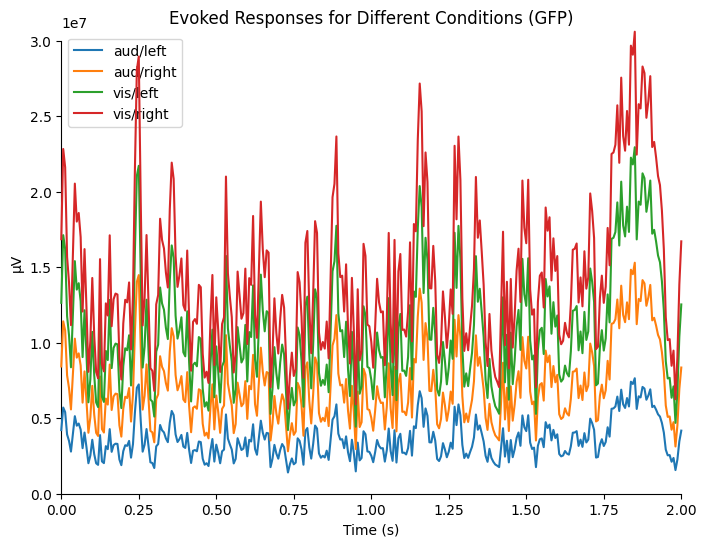

[<Figure size 800x600 with 1 Axes>]

In [56]:


# Cargar el archivo .edf
edf_file_path = 'ICA_removed.edf'
edf_reader = pyedflib.EdfReader(edf_file_path)

# Obtener información del archivo
n_signals = edf_reader.signals_in_file
signal_labels = edf_reader.getSignalLabels()
sample_frequencies = edf_reader.getSampleFrequencies()

print(f"Number of signals: {n_signals}")
print(f"Signal labels: {signal_labels}")
print(f"Sample frequencies: {sample_frequencies}")

# Leer y convertir todas las señales en un array de NumPy
signals = np.array([edf_reader.readSignal(i) for i in range(n_signals)])

# Usar la primera señal para calcular estadísticas
signal = signals[0]

# Calcular estadísticas de la señal
signal_rms = np.sqrt(np.mean(signal**2))
signal_std = np.std(signal)
signal_min = np.min(signal)
signal_max = np.max(signal)

print(f"RMS: {signal_rms}, STD: {signal_std}, Min: {signal_min}, Max: {signal_max}")

# Cerrar el archivo después de la lectura
edf_reader.close()

# Crear estructura de información MNE
info = mne.create_info(ch_names=signal_labels, sfreq=sample_frequencies[0], ch_types='eeg')
raw = mne.io.RawArray(signals, info)

# Generar eventos ficticios y calcular promedios evocados
events = mne.make_fixed_length_events(raw, duration=2)
epochs = mne.Epochs(raw, events, tmin=0, tmax=2, baseline=(None))
evoked = epochs.average()

# Definir condiciones y escalar los datos
conds = ["aud/left", "aud/right", "vis/left", "vis/right"]
evoked_list = [evoked.copy().apply_baseline(baseline=(None, None)) for _ in conds]

# Modificar comentarios y escalar los datos
for idx, evk in enumerate(evoked_list, start=1):
    evk.comment = conds[idx - 1]
    evk.data *= idx

# Crear diccionario de respuestas evocadas
evks = dict(zip(conds, evoked_list))

# Graficar las señales
mne.viz.plot_compare_evokeds(evks, picks="eeg", title="Evoked Responses for Different Conditions")

     

Número de señales: 64
Etiquetas de las señales: ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']
Frecuencias de muestreo: [160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160.]
RMS: 21.955383169466703, Desviación estándar: 21.955078664064246, Mínimo: -125.72263345744194, Máximo: 129.20611097293008
Creating RawArray with float64 data, n_channels=64, n_times=97

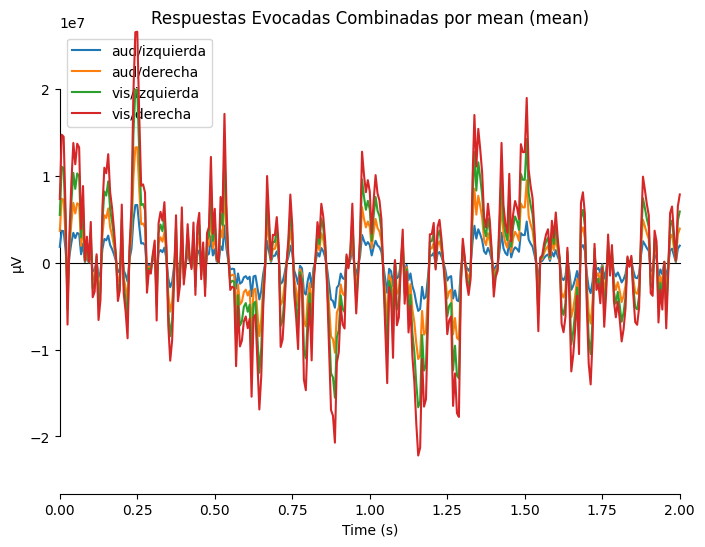

combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "median"


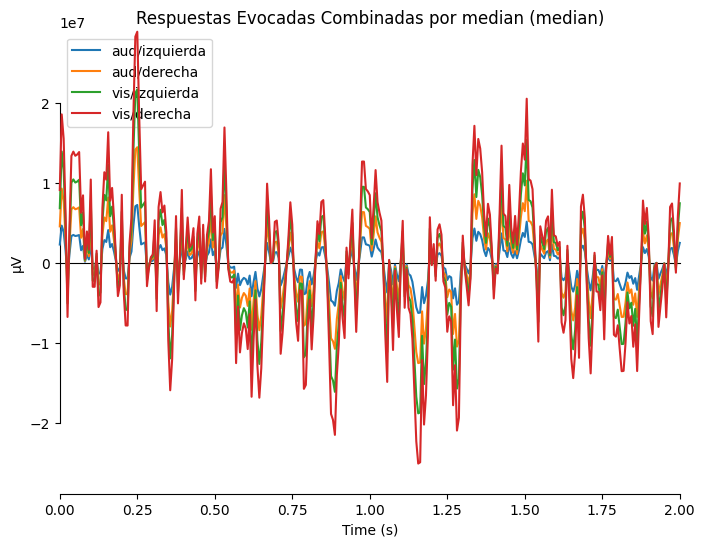

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


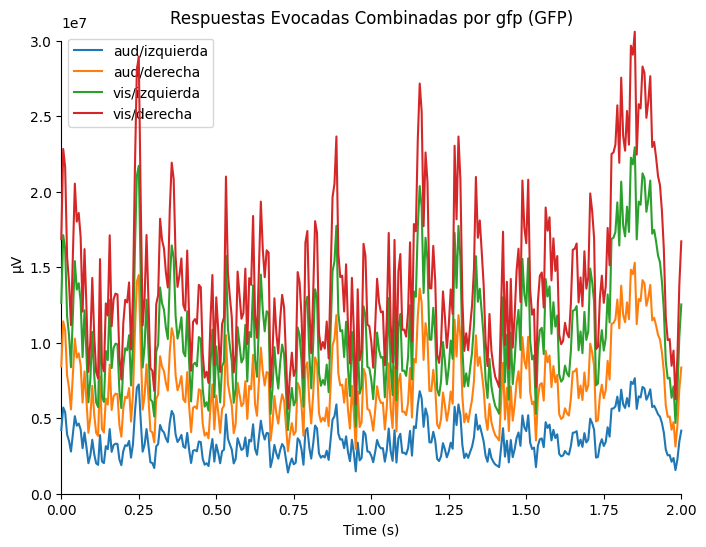

combining channels using "<function Lawea at 0x000001788E3B92F0>"
combining channels using "<function Lawea at 0x000001788E3B92F0>"
combining channels using "<function Lawea at 0x000001788E3B92F0>"
combining channels using "<function Lawea at 0x000001788E3B92F0>"


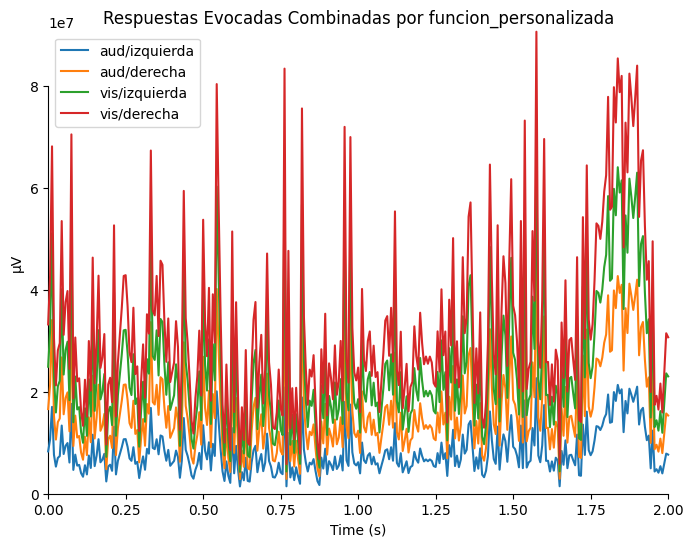

In [63]:

# Cargar y leer el archivo .edf
file_path = 'ICA_removed.edf'
edf_reader = pyedflib.EdfReader(file_path)

# Obtener información básica del archivo .edf
n_signals = edf_reader.signals_in_file
signal_labels = edf_reader.getSignalLabels()
sample_frequencies = edf_reader.getSampleFrequencies()

print(f"Número de señales: {n_signals}")
print(f"Etiquetas de las señales: {signal_labels}")
print(f"Frecuencias de muestreo: {sample_frequencies}")

# Extraer todas las señales y convertirlas a un array de NumPy
signals = np.array([edf_reader.readSignal(i) for i in range(n_signals)])

# Seleccionar la primera señal para calcular estadísticas
primera_señal = signals[0]

# Calcular estadísticas de la señal
rms = np.sqrt(np.mean(primera_señal ** 2))
std = np.std(primera_señal)
min_val = np.min(primera_señal)
max_val = np.max(primera_señal)

print(f"RMS: {rms}, Desviación estándar: {std}, Mínimo: {min_val}, Máximo: {max_val}")

# Cerrar el archivo .edf después de la lectura
edf_reader.close()

# Crear la estructura de información para MNE
info = mne.create_info(ch_names=signal_labels, sfreq=sample_frequencies[0], ch_types='eeg')
raw = mne.io.RawArray(signals, info)

# Generar eventos ficticios y calcular promedios evocados
eventos = mne.make_fixed_length_events(raw, duration=2)
epochs = mne.Epochs(raw, eventos, tmin=0, tmax=2, baseline=(None))
promedio_evoked = epochs.average()

# Definir condiciones y ajustar los datos
condiciones = ["aud/izquierda", "aud/derecha", "vis/izquierda", "vis/derecha"]
evoked_adjusted_list = [promedio_evoked.copy().apply_baseline(baseline=(None, None)) for _ in condiciones]

# Modificar los comentarios y escalar los datos para diferenciarlos
for indice, evoked in enumerate(evoked_adjusted_list, start=1):
    evoked.comment = condiciones[indice - 1]
    evoked.data *= indice  # Escalar los datos para diferenciarlos

# Crear un diccionario de respuestas evocadas
evoked_dict = dict(zip(condiciones, evoked_adjusted_list))

# Definir una función personalizada para combinar
def Lawea(x):
    return x.max(axis=1)

# Comparar respuestas evocadas utilizando diferentes métodos de combinación
metodos_combinacion = ["mean", "median", "gfp", Lawea]

for metodo in metodos_combinacion:
    titulo = f'Respuestas Evocadas Combinadas por {metodo if isinstance(metodo, str) else "funcion_personalizada"}'
    mne.viz.plot_compare_evokeds(evoked_dict, picks="eeg", combine=metodo, title=titulo)

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


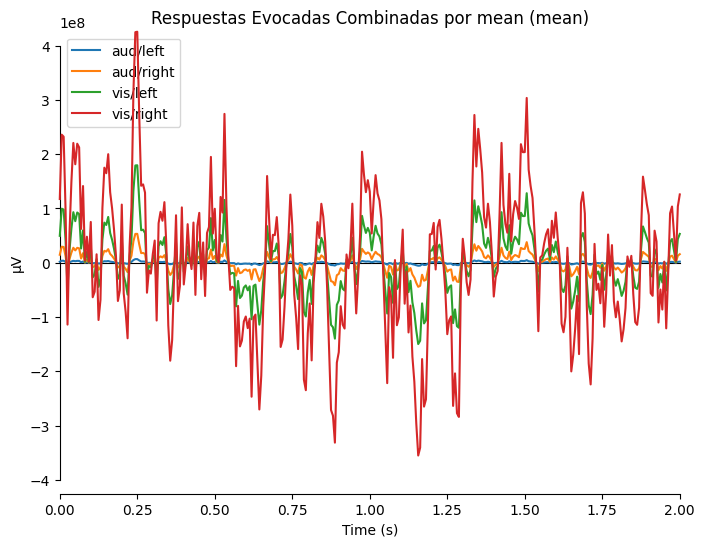

combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "median"


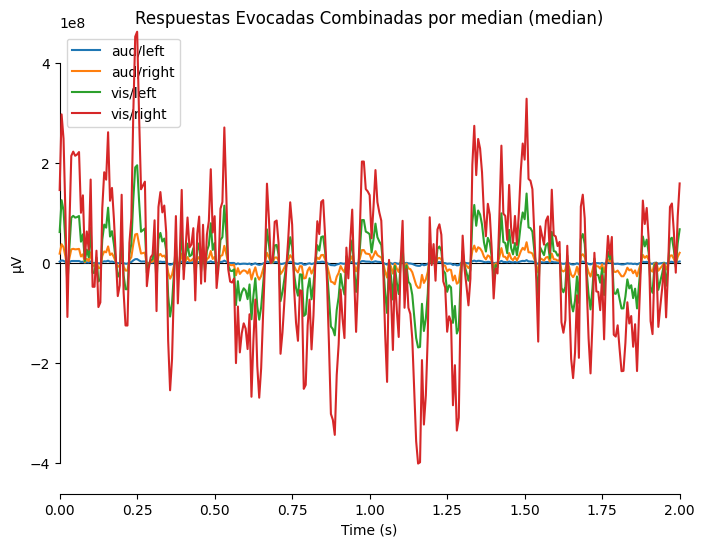

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


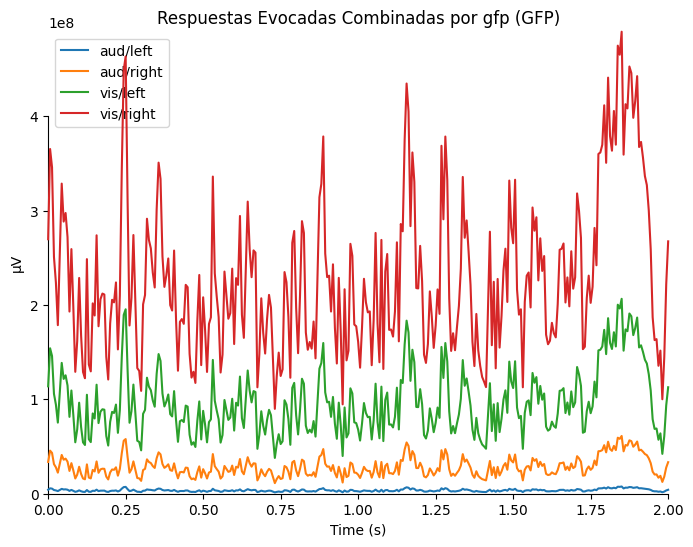

combining channels using "<function Lawea at 0x000001788E3B92F0>"
combining channels using "<function Lawea at 0x000001788E3B92F0>"
combining channels using "<function Lawea at 0x000001788E3B92F0>"
combining channels using "<function Lawea at 0x000001788E3B92F0>"


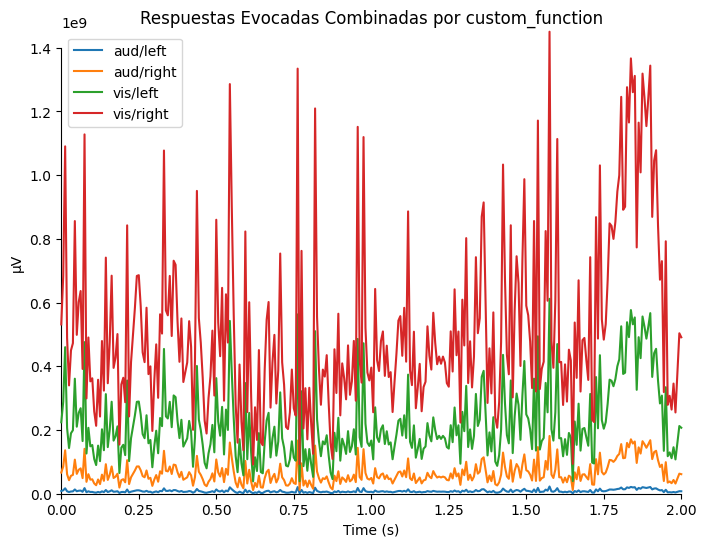

In [64]:
# Ajustar comentarios y escalar datos para diferenciarlos
for indice, evoked in enumerate(evoked_list, start=1):
    evoked.comment = conds[indice - 1]
    evoked.data *= indice  # Escalar datos para diferenciarlos

# Crear un diccionario de respuestas evocadas
evoked_dict = dict(zip(conds, evoked_list))


# Comparar respuestas evocadas usando diferentes métodos de combinación
combine_methods = ("mean", "median", "gfp", Lawea)

for method in combine_methods:
    title = f'Respuestas Evocadas Combinadas por {method if isinstance(method, str) else "custom_function"}'
    mne.viz.plot_compare_evokeds(evoked_dict, picks="eeg", combine=method, title=title)


combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


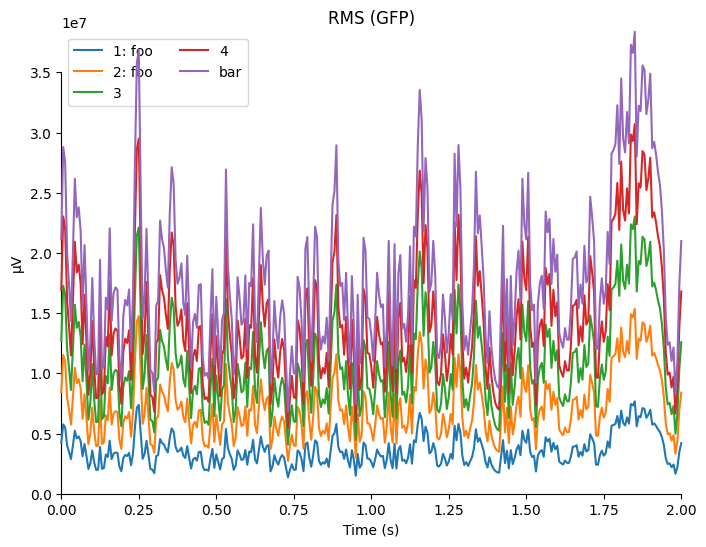

[<Figure size 800x600 with 1 Axes>]

In [59]:
# Crear lista de promedios evocados
evokeds_list = [epochs.average()]
temp_list = []

# Ajustar comentarios y escalar datos para diferenciarlos
comentarios = ("foo", "foo", "", None, "bar")
for indice, comentario in enumerate(comentarios, start=1):
    evoked_copia = evokeds_list[0].copy()
    evoked_copia.comment = comentario
    evoked_copia.data *= indice  # Escalar datos para diferenciarlos
    temp_list.append(evoked_copia)

# Graficar las señales utilizando comentarios personalizados
mne.viz.plot_compare_evokeds(temp_list, picks="eeg", title="RMS")


Número de señales: 64
Etiquetas de las señales: ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']
Frecuencias de muestreo: [160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160.]
RMS: 21.955383169466703, Desviación estándar: 21.955078664064246, Mínimo: -125.72263345744194, Máximo: 129.20611097293008
Creating RawArray with float64 data, n_channels=64, n_times=97

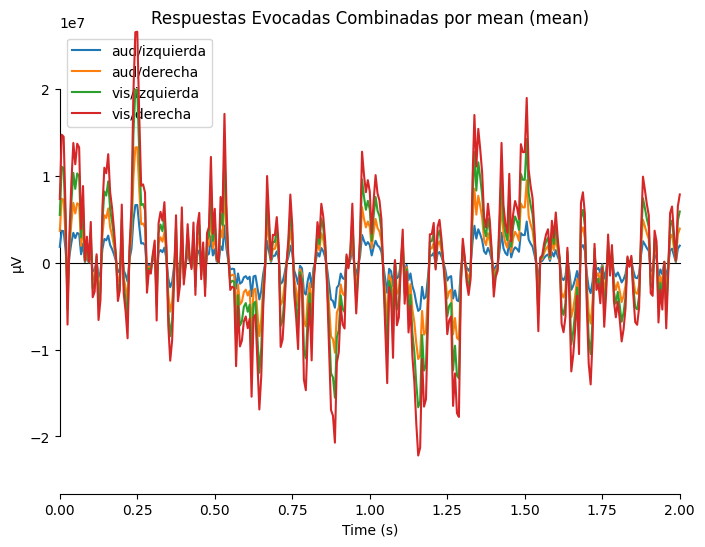

combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "median"


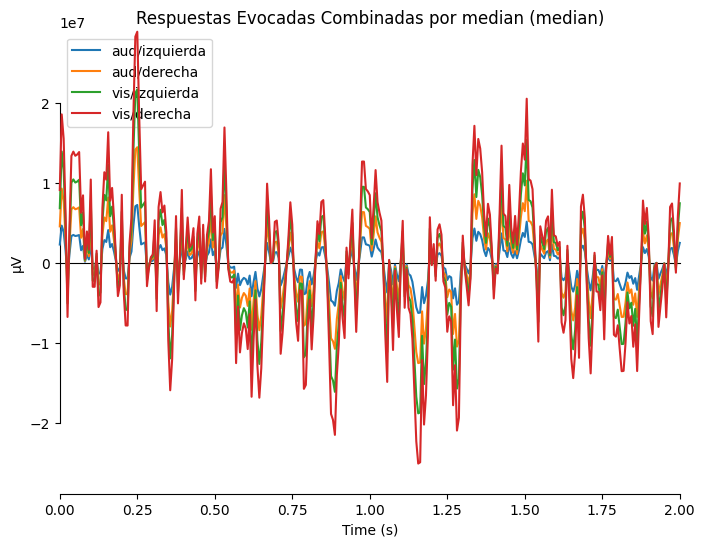

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


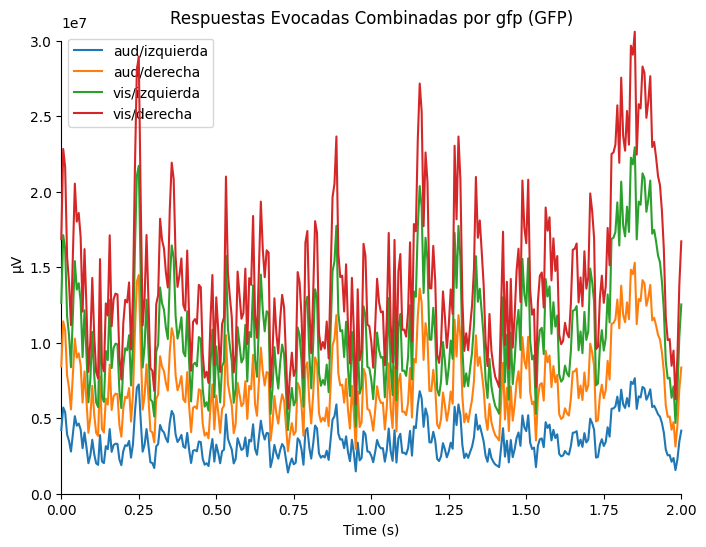

combining channels using "<function funcion_personalizada at 0x000001788E8E3D90>"
combining channels using "<function funcion_personalizada at 0x000001788E8E3D90>"
combining channels using "<function funcion_personalizada at 0x000001788E8E3D90>"
combining channels using "<function funcion_personalizada at 0x000001788E8E3D90>"


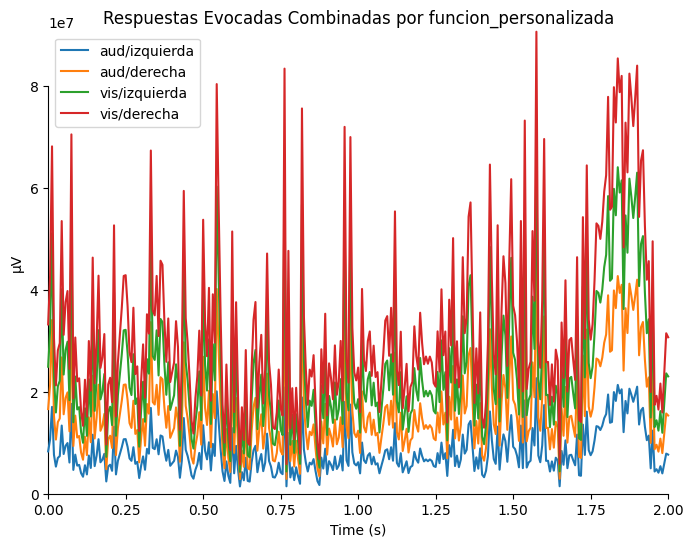

RuntimeError: No digitization points found.

In [62]:

# Cargar y leer el archivo .edf
file_path = 'ICA_removed.edf'
edf_reader = pyedflib.EdfReader(file_path)

# Obtener información básica del archivo .edf
n_signals = edf_reader.signals_in_file
signal_labels = edf_reader.getSignalLabels()
sample_frequencies = edf_reader.getSampleFrequencies()

print(f"Número de señales: {n_signals}")
print(f"Etiquetas de las señales: {signal_labels}")
print(f"Frecuencias de muestreo: {sample_frequencies}")

# Extraer todas las señales y convertirlas a un array de NumPy
signals = np.array([edf_reader.readSignal(i) for i in range(n_signals)])

# Seleccionar la primera señal para calcular estadísticas
primera_señal = signals[0]

# Calcular estadísticas de la señal
rms = np.sqrt(np.mean(primera_señal ** 2))
std = np.std(primera_señal)
min_val = np.min(primera_señal)
max_val = np.max(primera_señal)

print(f"RMS: {rms}, Desviación estándar: {std}, Mínimo: {min_val}, Máximo: {max_val}")

# Cerrar el archivo .edf después de la lectura
edf_reader.close()

# Crear la estructura de información para MNE
info = mne.create_info(ch_names=signal_labels, sfreq=sample_frequencies[0], ch_types='eeg')
raw = mne.io.RawArray(signals, info)

# Generar eventos ficticios y calcular promedios evocados
eventos = mne.make_fixed_length_events(raw, duration=2)
epochs = mne.Epochs(raw, eventos, tmin=0, tmax=2, baseline=(None))
promedio_evoked = epochs.average()

# Definir condiciones y ajustar los datos
condiciones = ["aud/izquierda", "aud/derecha", "vis/izquierda", "vis/derecha"]
evoked_adjusted_list = [promedio_evoked.copy().apply_baseline(baseline=(None, None)) for _ in condiciones]

# Ajustar comentarios y escalar datos para diferenciarlos
for indice, evoked in enumerate(evoked_adjusted_list, start=1):
    evoked.comment = condiciones[indice - 1]
    evoked.data *= indice  # Escalar datos para diferenciarlos

# Crear un diccionario de respuestas evocadas
evoked_dict = dict(zip(condiciones, evoked_adjusted_list))

# Definir una función personalizada para combinar
def funcion_personalizada(x):
    return x.max(axis=1)

# Comparar respuestas evocadas utilizando diferentes métodos de combinación
metodos_combinacion = ["mean", "median", "gfp", funcion_personalizada]

for metodo in metodos_combinacion:
    titulo = f'Respuestas Evocadas Combinadas por {metodo if isinstance(metodo, str) else "funcion_personalizada"}'
    mne.viz.plot_compare_evokeds(evoked_dict, picks="eeg", combine=metodo, title=titulo)

# Visualización adicional: Topomap de las señales EEG
promedio_evoked.plot_topomap(times='auto')

# Visualización adicional: Señales en el dominio del tiempo
raw.plot(title='Señales EEG en el Dominio del Tiempo')

# Visualización adicional: PSD (Power Spectral Density)
raw.plot_psd(fmin=0, fmax=50, average=True)